In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
breast = pd.read_csv('/content/breast cancer.csv')
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
breast.drop('Unnamed: 32', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
breast['diagnosis'] = le.fit_transform(breast['diagnosis'])

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X = breast.drop('diagnosis', axis=1)
y = breast['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.19.0


In [ ]:
# Build the model
def build_simple_nn(input_dim):
    model = keras.Sequential([
        # Input layer
        layers.Input(shape=(input_dim,)),

        # Hidden layers with Batch Normalization
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),

        # Output layer (binary classification)
        layers.Dense(1, activation='sigmoid')
    ])

    return model

# Create model
model = build_simple_nn(X_train.shape[1])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,361 (60.00 KB)

 Trainable params: 14,913 (58.25 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Compile with Adam optimizer
model.compile(
    optimizer=keras.optimizers.Adam(
        learning_rate=0.001,      # Default is 0.001
        beta_1=0.9,              # Exponential decay rate for first moment
        beta_2=0.999,            # Exponential decay rate for second moment
        epsilon=1e-07,           # Small constant for numerical stability
        amsgrad=False            # Whether to use AMSGrad variant
    ),
    loss='binary_crossentropy',  # For binary classification
    metrics=[
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall'),
        keras.metrics.AUC(name='auc')
    ]
)

In [ ]:
# Define callbacks for better training
callbacks = [
    # Early stopping to prevent overfitting
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=20,
        restore_best_weights=True,
        verbose=1
    ),

    # Reduce learning rate when plateau
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=10,
        min_lr=1e-6,
        verbose=1
    ),

    # Model checkpoint
    keras.callbacks.ModelCheckpoint(
        'best_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )
]

# Train the model
print("\n" + "="*50)
print("TRAINING NEURAL NETWORK")
print("="*50)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)


TRAINING NEURAL NETWORK
Epoch 1/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1:02 4s/step - accuracy: 0.5312 - auc: 0.6137 - loss: 0.7336 - precision: 0.5000 - recall: 0.4667
Epoch 1: val_accuracy improved from -inf to 0.94737, saving model to best_model.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.6951 - auc: 0.7814 - loss: 0.5518 - precision: 0.5881 - recall: 0.7039 - val_accuracy: 0.9474 - val_auc: 0.9931 - val_loss: 0.3916 - val_precision: 0.9512 - val_recall: 0.9070 - learning_rate: 0.0010
Epoch 2/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8750 - auc: 0.9125 - loss: 0.3573 - precision: 0.7857 - recall: 0.9167
Epoch 2: val_accuracy did not improve from 0.94737
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9318 - auc: 0.9744 - loss: 0.2439 - precision: 0.8848 - recall: 0.9423 - val_accuracy: 0.9386 - val_auc: 0.9967 - val_loss: 0.3049 - val_precision: 0.9500 - val_recall: 0.8837 - learning_rate: 0.0010
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc

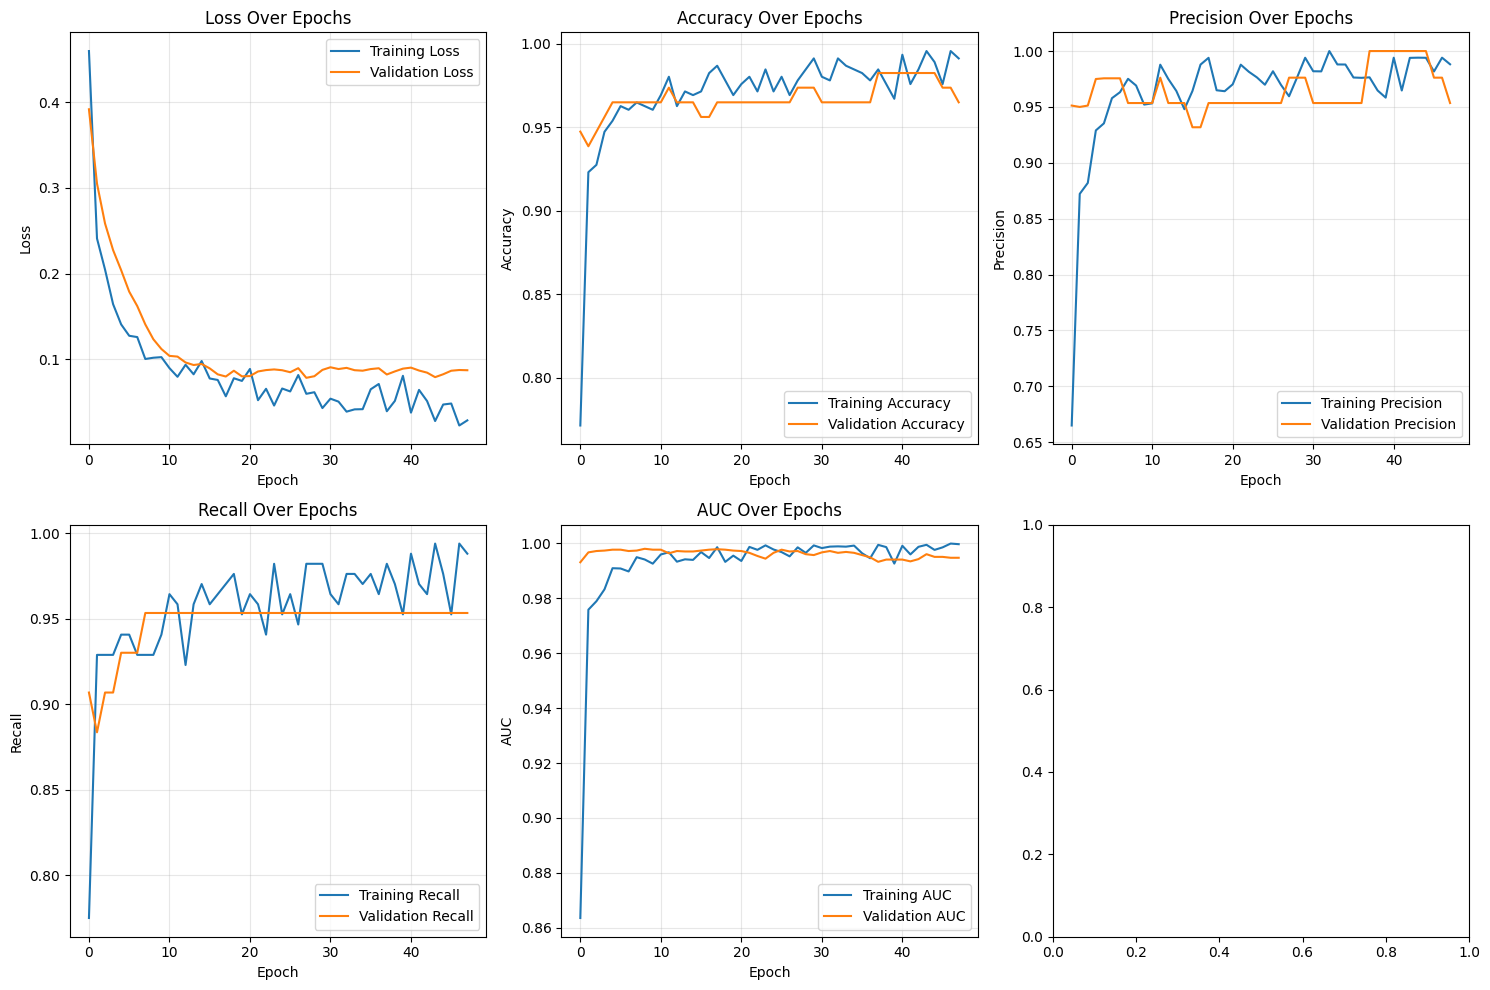

In [ ]:
# Plot training history
def plot_training_history(history):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # Loss
    axes[0, 0].plot(history.history['loss'], label='Training Loss')
    axes[0, 0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0, 0].set_title('Loss Over Epochs')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)

    # Accuracy
    axes[0, 1].plot(history.history['accuracy'], label='Training Accuracy')
    axes[0, 1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0, 1].set_title('Accuracy Over Epochs')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)

    # Precision
    axes[0, 2].plot(history.history['precision'], label='Training Precision')
    axes[0, 2].plot(history.history['val_precision'], label='Validation Precision')
    axes[0, 2].set_title('Precision Over Epochs')
    axes[0, 2].set_xlabel('Epoch')
    axes[0, 2].set_ylabel('Precision')
    axes[0, 2].legend()
    axes[0, 2].grid(alpha=0.3)

    # Recall
    axes[1, 0].plot(history.history['recall'], label='Training Recall')
    axes[1, 0].plot(history.history['val_recall'], label='Validation Recall')
    axes[1, 0].set_title('Recall Over Epochs')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Recall')
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)

    # AUC
    axes[1, 1].plot(history.history['auc'], label='Training AUC')
    axes[1, 1].plot(history.history['val_auc'], label='Validation AUC')
    axes[1, 1].set_title('AUC Over Epochs')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('AUC')
    axes[1, 1].legend()
    axes[1, 1].grid(alpha=0.3)

    # Learning Rate (if recorded)
    if 'lr' in history.history:
        axes[1, 2].plot(history.history['lr'], label='Learning Rate')
        axes[1, 2].set_title('Learning Rate Schedule')
        axes[1, 2].set_xlabel('Epoch')
        axes[1, 2].set_ylabel('Learning Rate')
        axes[1, 2].set_yscale('log')
        axes[1, 2].legend()
        axes[1, 2].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_training_history(history)


MODEL EVALUATION
Test Loss: 0.0783
Test Accuracy: 0.9737
Test Precision: 0.9762
Test Recall: 0.9535
Test AUC: 0.9972

--------------------------------------------------
CLASSIFICATION REPORT
--------------------------------------------------
               precision    recall  f1-score   support

   Benign (0)       0.97      0.99      0.98        71
Malignant (1)       0.98      0.95      0.96        43

     accuracy                           0.97       114
    macro avg       0.97      0.97      0.97       114
 weighted avg       0.97      0.97      0.97       114



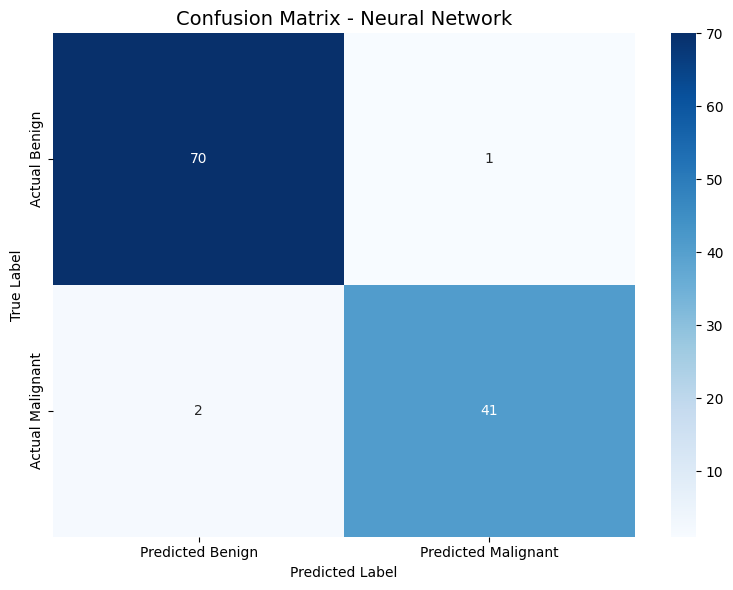

In [ ]:
# Evaluate on test set
print("\n" + "="*50)
print("MODEL EVALUATION")
print("="*50)

test_results = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_results[0]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")
print(f"Test Precision: {test_results[2]:.4f}")
print(f"Test Recall: {test_results[3]:.4f}")
print(f"Test AUC: {test_results[4]:.4f}")

# Make predictions
y_pred_proba = model.predict(X_test, verbose=0)
y_pred = (y_pred_proba > 0.5).astype(int)

# Classification report
print("\n" + "-"*50)
print("CLASSIFICATION REPORT")
print("-"*50)
print(classification_report(y_test, y_pred,
                            target_names=['Benign (0)', 'Malignant (1)']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'])
plt.title('Confusion Matrix - Neural Network', fontsize=14)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [ ]:
def build_deeper_nn(input_dim):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),

        # First block
        layers.Dense(256, activation='relu',
                     kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.4),

        # Second block
        layers.Dense(128, activation='relu',
                     kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        # Third block
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        # Fourth block
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),

        # Output layer
        layers.Dense(1, activation='sigmoid')
    ])

    return model

# Create and compile
model_deep = build_deeper_nn(X_train.shape[1])

# Custom Adam optimizer with different parameters
custom_adam = keras.optimizers.Adam(
    learning_rate=0.0005,  # Smaller learning rate for deeper network
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    amsgrad=True  # Use AMSGrad variant for better convergence
)

model_deep.compile(
    optimizer=custom_adam,
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision', 'recall', 'auc']
)

print("Deeper model summary:")
model_deep.summary()

Deeper model summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,377 (208.50 KB)

 Trainable params: 52,417 (204.75 KB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
# Dynamic learning rate schedule
def lr_schedule(epoch):
    """Learning Rate Schedule"""
    lr = 0.001
    if epoch > 50:
        lr = 0.0005
    if epoch > 80:
        lr = 0.0001
    return lr

lr_scheduler = keras.callbacks.LearningRateScheduler(lr_schedule)

# Model with learning rate scheduler
model_lr = build_simple_nn(X_train.shape[1])

model_lr.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train with learning rate scheduler
history_lr = model_lr.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[lr_scheduler],
    verbose=0
)

print("\nTraining with learning rate scheduler completed!")


Training with learning rate scheduler completed!



COMPARING ADAM CONFIGURATIONS

Training with Adam_default...
Adam_default Test Accuracy: 0.9649

Training with Adam_low_lr...
Adam_low_lr Test Accuracy: 0.9561

Training with Adam_high_momentum...
Adam_high_momentum Test Accuracy: 0.9649

Training with Adam_amsgrad...
Adam_amsgrad Test Accuracy: 0.9649

Training with Adam_custom...
Adam_custom Test Accuracy: 0.9474


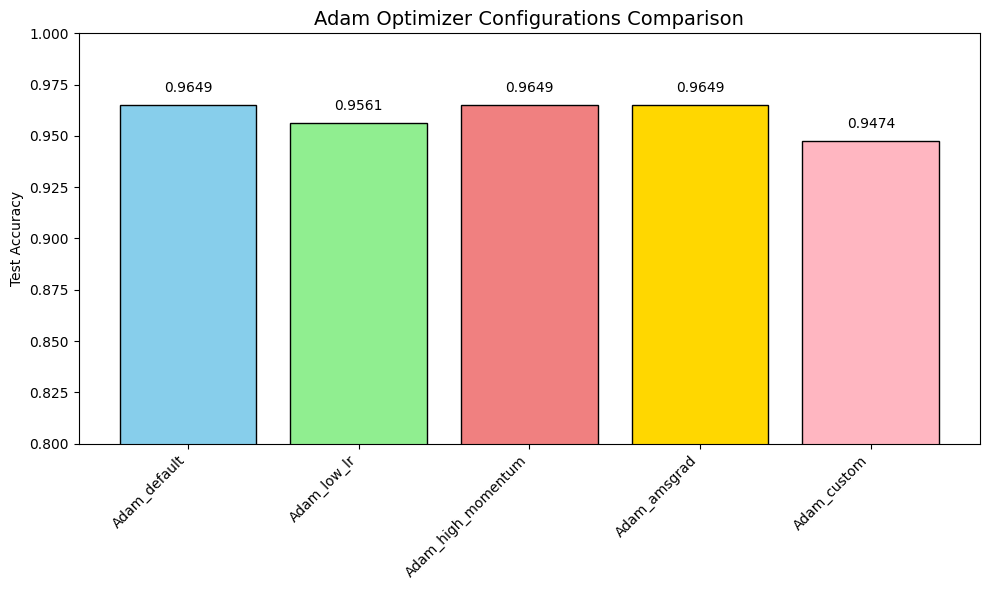

In [ ]:
# Test different Adam configurations
def test_adam_configurations(X_train, y_train, X_test, y_test):
    configurations = {
        'Adam_default': {'learning_rate': 0.001, 'beta_1': 0.9, 'beta_2': 0.999},
        'Adam_low_lr': {'learning_rate': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999},
        'Adam_high_momentum': {'learning_rate': 0.001, 'beta_1': 0.99, 'beta_2': 0.999},
        'Adam_amsgrad': {'learning_rate': 0.001, 'beta_1': 0.9, 'beta_2': 0.999, 'amsgrad': True},
        'Adam_custom': {'learning_rate': 0.001, 'beta_1': 0.85, 'beta_2': 0.995}
    }

    results = {}

    for name, params in configurations.items():
        print(f"\nTraining with {name}...")

        # Build fresh model
        model = build_simple_nn(X_train.shape[1])

        # Compile with specific Adam configuration
        model.compile(
            optimizer=keras.optimizers.Adam(**params),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

        # Train quickly
        model.fit(
            X_train, y_train,
            validation_split=0.2,
            epochs=30,
            batch_size=32,
            verbose=0
        )

        # Evaluate
        test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
        results[name] = test_acc
        print(f"{name} Test Accuracy: {test_acc:.4f}")

    return results

# Run comparison
print("\n" + "="*50)
print("COMPARING ADAM CONFIGURATIONS")
print("="*50)
results = test_adam_configurations(X_train, y_train, X_test, y_test)

# Plot comparison
plt.figure(figsize=(10, 6))
configs = list(results.keys())
accuracies = list(results.values())
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightpink']

bars = plt.bar(configs, accuracies, color=colors, edgecolor='black')
plt.ylim(0.8, 1.0)
plt.title('Adam Optimizer Configurations Comparison', fontsize=14)
plt.ylabel('Test Accuracy')
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{acc:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Your input for prediction
input_text = (-0.23717126, -0.64487029, -0.11382239, -0.57427777, -0.60294971,
        1.0897546 ,  0.91543814,  0.41448279,  0.09311633,  1.78465117,
        2.11520208,  0.28454765, -0.31910982,  0.2980991 ,  0.01968238,
       -0.47096352,  0.45757106,  0.28733283, -0.23125455,  0.26417944,
        0.66325388,  0.12170193,  0.42656325,  0.36885508,  0.02065602,
        1.39513782,  2.0973271 ,  2.01276347,  0.61938913,  2.9421769 ,
        3.15970842)

np_df = np.asarray(input_text).reshape(1, -1)

# Make prediction
pred_proba = model.predict(np_df, verbose=0)
pred_class = (pred_proba > 0.5).astype(int)[0][0]
confidence = pred_proba[0][0] if pred_class == 1 else 1 - pred_proba[0][0]

print("\n" + "="*50)
print("SINGLE PREDICTION - NEURAL NETWORK")
print("="*50)
print(f"Raw Prediction Probability: {pred_proba[0][0]:.6f}")
print(f"Probability of Malignant (1): {pred_proba[0][0]:.2%}")
print(f"Probability of Benign (0): {(1 - pred_proba[0][0]):.2%}")
print(f"Predicted Class: {pred_class}")

if pred_class == 1:
    print(" Neural Network Diagnosis: MALIGNANT (Cancerous)")
    print(f" Confidence: {pred_proba[0][0]:.2%}")
    print(f" Risk Level: {'HIGH' if pred_proba[0][0] > 0.8 else 'MEDIUM' if pred_proba[0][0] > 0.6 else 'LOW'}")
else:
    print("Neural Network Diagnosis: BENIGN (Not Cancerous)")
    print(f" Confidence: {(1 - pred_proba[0][0]):.2%}")


SINGLE PREDICTION - NEURAL NETWORK
Raw Prediction Probability: 0.996811
Probability of Malignant (1): 99.68%
Probability of Benign (0): 0.32%
Predicted Class: 1
 Neural Network Diagnosis: MALIGNANT (Cancerous)
 Confidence: 99.68%
 Risk Level: HIGH


In [ ]:
# Save the best model
model.save('breast_cancer_nn_model.keras')
print("\nModel saved as 'breast_cancer_nn_model.keras'")

# To load and use later:
# loaded_model = keras.models.load_model('breast_cancer_nn_model.keras')
# predictions = loaded_model.predict(new_data)


Model saved as 'breast_cancer_nn_model.keras'
